In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math

from matplotlib.ticker import LogLocator

In [36]:
def set_sns_style():
    sns.set(font_scale=1.5)
    sns.set_style("whitegrid")

    plt.rcParams['font.family'] = 'serif'  # Set font to Times New Roman
    plt.rcParams['text.color'] = 'black'  # Set text color to black
    plt.rcParams['axes.labelcolor'] = 'black'  # Set axis labels color to black
    plt.rcParams['xtick.color'] = 'black'  # Set x-tick color to black
    plt.rcParams['ytick.color'] = 'black'  # Set y-tick color to black
    plt.rcParams['axes.edgecolor'] = 'black'  # Set axes edge color to black
    plt.rcParams['axes.titleweight'] = 'bold'  # Bold title for emphasis

In [37]:
binary_df = pd.read_csv("reports/numpy_binary_times.csv")
# ternary_df = pd.read_csv("multiplication_times_ternary.csv")

In [38]:
binary_df.head()

,n,standard,rsr,rsrpp
0,2048,0.022676,0.013405,0.019047
1,4096,0.146511,0.033453,0.046914
2,8192,0.922117,0.088837,0.166224
3,16384,4.902223,0.285241,0.401454
4,32768,22.480075,0.936295,1.369630


In [47]:
def plot(df, filename: str):
    set_sns_style()

    n = df['n']  
    standard = df['standard'] * 1000 # convert s to ms 
    rsr = df['rsr'] * 1000
    rsrpp = df['rsrpp'] * 1000

    plt.figure(figsize=(10, 6))


    # Plot times for NaiveMultiplier and RSRMultiplier
    plt.plot(n, standard, label='Standard (NumPy)', marker="o")
    plt.plot(n, rsr, label='RSR', marker="o")


    # Draw lines connecting Naive and RSR times for each vector length to show speedup visually
    for i in range(len(n)):
        plt.plot([n[i], n[i]], [standard[i], rsr[i]], 
                color='gray', linestyle='--')

    # Label the points with the speedup factor
    for i, length in enumerate(n):
        plt.text(length, (standard[i] + rsr[i]) / 2, f"{standard[i]/rsr[i]:.2f}x",
                ha='left', va="top", color='red')

    # Configure the plot aesthetics
    plt.xscale('log', base=2)
    plt.yscale('log', base=10)
    plt.xlabel('$n$')
    plt.ylabel('Time (ms)')
    plt.legend()

    # Configure x-axis ticks for log base 2 and a clean grid
    plt.gca().xaxis.set_major_locator(LogLocator(base=2))

    # Save as EPS and display
    plt.savefig(f"{filename}.eps", format='eps', bbox_inches='tight')
    plt.show()


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


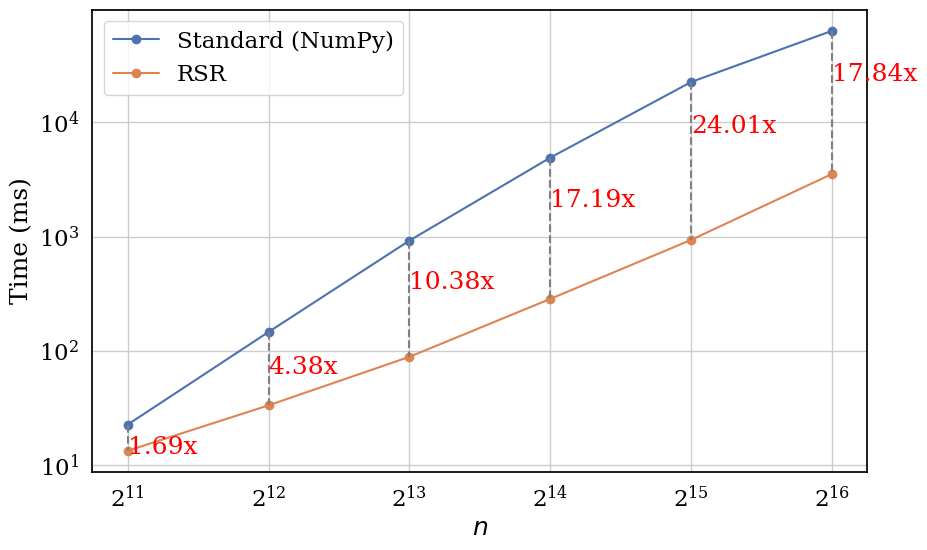

In [48]:
plot(binary_df, "figures/numpy_binary")
# plot(ternary_df, "new_ternary")

### K Comparison

In [6]:
k_comparison_df = pd.read_csv("reports/compare_k.csv")

In [7]:
k_comparison_df.head()

,n,k,rsr,rsrpp
0,2048,1,27,28
1,2048,2,14,14
2,2048,3,9,10
3,2048,4,8,7
4,2048,5,8,6


In [33]:
def plot_k_comparison(data, filename):
    set_sns_style()
    
    # Function to format legend labels in log2 format
    def format_log2_labels(n_values):
        return [f"$2^{{{int(np.log2(n))}}}$" for n in n_values]

    # Plot for RSR times
    plt.figure(figsize=(10, 6))
    rsr_plot = sns.lineplot(data=data, x='k', y='rsr', hue='n', marker='o', palette="viridis")
    plt.xlabel("$k$")
    plt.ylabel("Time (ms)")
    plt.yscale('log', base=10)

    # Format legend in log2
    handles, labels = rsr_plot.get_legend_handles_labels()
    formatted_labels = format_log2_labels(data['n'].unique())
    plt.legend(handles, formatted_labels, title="$n$", loc='best', ncol=len(handles)/2)

    # Mark optimal points for RSR
    for n_value, subset in data.groupby("n"):
        min_row = subset.loc[subset['rsr'].idxmin()]
        plt.plot(min_row['k'], min_row['rsr'], 'ro', label=f"Optimal for $n=2^{{{int(np.log2(n_value))}}}$" if n_value == data['n'].min() else "")

    plt.savefig(f"{filename}_rsr.eps", format='eps', bbox_inches='tight')

    plt.show()

    # Plot for RSRPP times
    plt.figure(figsize=(10, 6))
    rsrpp_plot = sns.lineplot(data=data, x='k', y='rsrpp', hue='n', marker='o', palette="viridis")
    plt.xlabel("$k$")
    plt.ylabel("Time (ms)")
    plt.yscale('log', base=10)

    # Format legend in log2
    handles, labels = rsrpp_plot.get_legend_handles_labels()
    plt.legend(handles, formatted_labels, title="$n$", loc='best', ncol=len(handles)/2)

    # Mark optimal points for RSRPP
    for n_value, subset in data.groupby("n"):
        min_row = subset.loc[subset['rsrpp'].idxmin()]
        plt.plot(min_row['k'], min_row['rsrpp'], 'ro', label=f"Optimal for $n=2^{{{int(np.log2(n_value))}}}$" if n_value == data['n'].min() else "")

    plt.savefig(f"{filename}_rsrpp.eps", format='eps', bbox_inches='tight')
    plt.show()


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


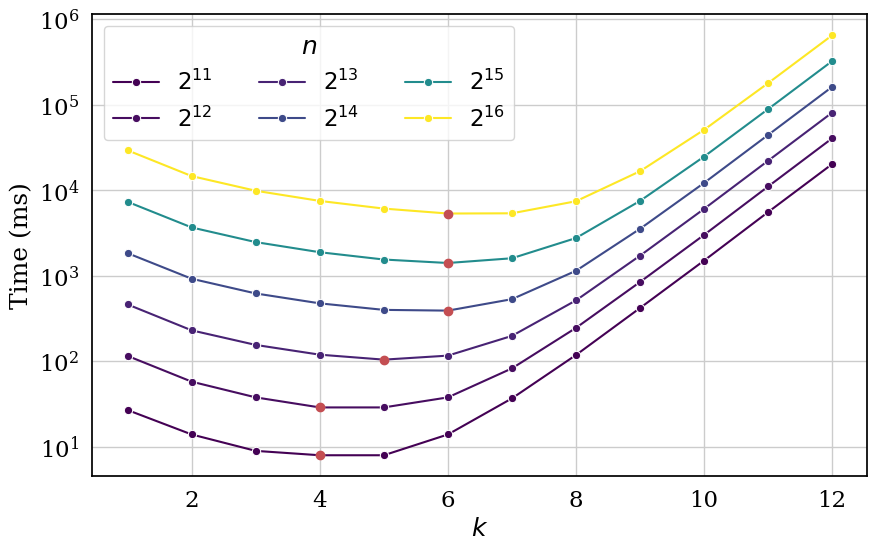

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


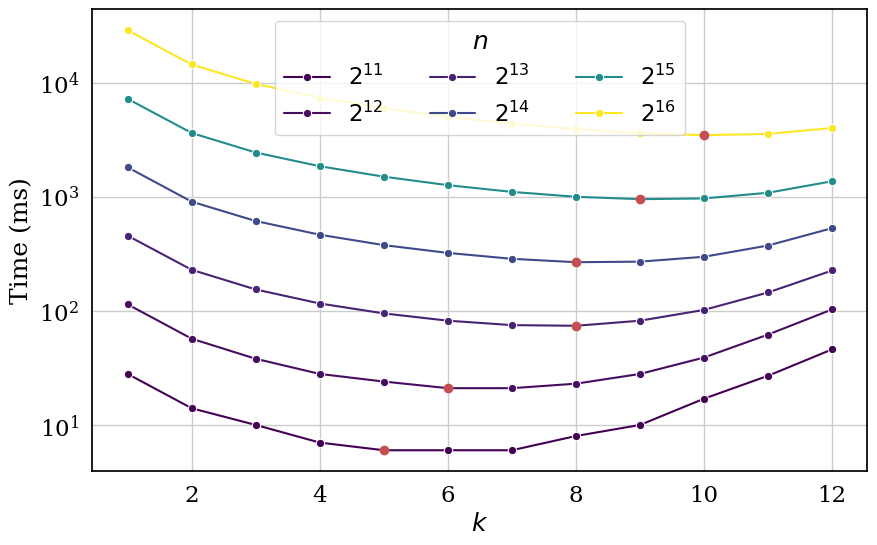

In [34]:
plot_k_comparison(k_comparison_df, "k")